Problem Statement

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company:
Approved: The Company has approved loan Application.
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.
Unused offer: Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
I will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

I will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [1]:
#i have to import important library,with help of library i will write the code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)
pd.set_option("display.max_columns",100)
pd.set_option("display.width",800)

In [2]:
#import the warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
# I am using the dataset 'application_data.csv' and 'previous_application.csv'.
df=pd.read_csv('application_data.csv')


In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Sing

In [5]:
df1=pd.read_csv('previous_application.csv')

In [6]:
df1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


 df and df1 Routine check

In [7]:
#use inbuilt function for upper five columns
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [8]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking the shape of dataframe
df.shape

(307511, 122)

In [10]:
df1.shape

(1670214, 37)

In [11]:
#checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [14]:
# checking the datatypes of each field in dataframe
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Data Analysis for df Data 


In [15]:
#checking for percentage of missing values in each column
df_data=df.isnull().sum()/len(df)*100

In [16]:
df_data

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

we can see here we have some null values in the columns.All these values are less than 50%.
Analysis of columns by checking less than 50% null values and checking if replacement is required or not  

In [17]:
df_data=df_data[df_data.values>50.0]
print(df_data)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [18]:
len(df_data)

41

In [19]:
df_data=list(df_data[df_data.values>=50.0].index)
df.drop(labels=df_data,axis=1,inplace=True)
print(len(df_data))

41


In [20]:
#After removing columns checking shape of dataframe
df.shape

(307511, 81)

checking the df dataset

In [21]:
#checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

# we can see that we have null value in the columns.All these values are less than 50%.
Analysis of columns by checking less than 19% null value and checking if replacement is required

In [22]:
df_data=df.isnull().sum()/len(df)*100
df_data=df_data[df_data.values<19.0]
print(df_data)
len(df_data)


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 71, dtype: float64


71

In [34]:
#1..Analysis of AMT_ANNUITY column


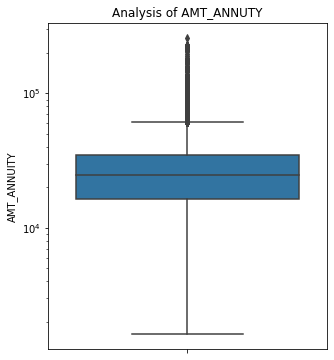

In [23]:
#plotting the values of AMT_ANNUITY column using box plot to detect outliers
plt.figure(figsize=(5,6))
sns.boxplot(y=df['AMT_ANNUITY'])
#to display matplotlib.pyplot with a logarithmic y_axis scale.
plt.yscale('log')
plt.title('Analysis of AMT_ANNUTY',fontsize=12)
plt.show()

In [24]:
#describe the info of column AMT_ANNUITY
print(df['AMT_ANNUITY'].mean())
print(df['AMT_ANNUITY'].median())
print(df['AMT_ANNUITY'].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


From the box plot we can see that there are sever outlinersnand
and the difference between max and min is quite severe.So we are taking median value
value to replace those null values.

In [25]:
#Verifying the count of missing value for AMT_ANNUITY column
df.AMT_ANNUITY.isnull().sum()

12

In [26]:
#filling missing values in column AMT_ANNUITY with median
df_missingvalue=df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'].fillna(value=df_missingvalue,inplace=True)

In [27]:
#checking the count of missing value for AMT_ANNUITY column
df.AMT_ANNUITY.isnull().sum()

0

In [29]:
# checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [32]:
#2..Analysis of CNT_FAM_MEMBERS

In [30]:
#checking count of family members
df['CNT_FAM_MEMBERS'].value_counts(dropna=False)


2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

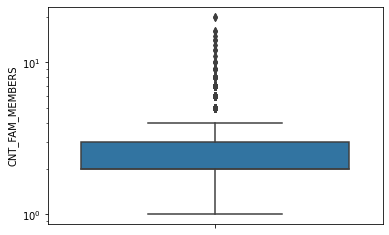

In [31]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers.
sns.boxplot(y=df['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [32]:
#describe the info of column 'CNT_FAM_MEMBERS'
print(df['CNT_FAM_MEMBERS'].mean())
print(df['CNT_FAM_MEMBERS'].median())
print(df['CNT_FAM_MEMBERS'].describe())

2.152665450442101
2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [33]:
#filling missing values in 'CNT_FAM_MEMBERS'column with median
df_missingvalue=df['CNT_FAM_MEMBERS'].median()
df['CNT_FAM_MEMBERS'].fillna(value=df_missingvalue,inplace=True)

In [34]:
#checking the count of missing value for CNT_FAM_MEMBERS column
df.CNT_FAM_MEMBERS.isnull().sum()

0

In [36]:
# checking the columns having less null percentage
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

###From the BoxPlot we can see that there are severe outliners and their is quite a difference between 75% and max.So we are taking median value to replace those null values.

In [38]:
#3. Analysis of Code gender
df['CODE_GENDER'].value_counts(dropna=False)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
## As We can see that Female(F) is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

In [39]:
#replace XNA with F and #checking count of each gender M/F

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

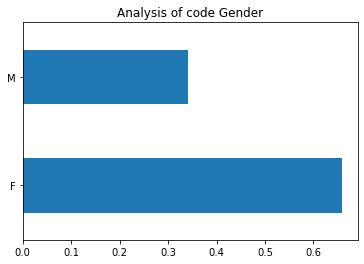

In [40]:
#plot the bar garph of CODE_GENDER
df['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of code Gender')
plt.show()

In [45]:
# 4. Analysis of ORGANIZATION_TYPE

In [41]:
# checking count of each type of organization where client works
df['ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

There are 55374 rows with XNA value which is 18% of the total count.so we can discard them.

In [42]:
#describe the info of column ORGANIZATION_TYPE
print(df['ORGANIZATION_TYPE'].mode())
print(df['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object
count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


5.Analysis of 'AMT_GOODS_PRICE'


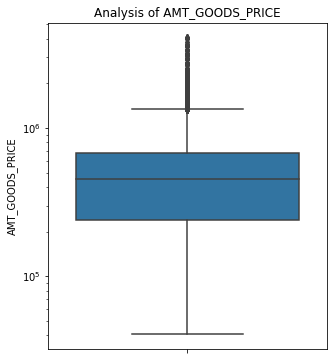

In [43]:
##box plotting the values of 'AMT_GOODS_PRICE'
plt.figure(figsize=(5,6))
sns.boxplot(y=df['AMT_GOODS_PRICE'])
#to display matplotlib.pyplot with a logarithmic y_axis scale.
plt.yscale('log')
plt.title('Analysis of AMT_GOODS_PRICE',fontsize=12)
plt.show()

In [44]:
print(df['AMT_GOODS_PRICE'].mean())
print(df['AMT_GOODS_PRICE'].median())
print(df['AMT_GOODS_PRICE'].describe())
print(df['AMT_GOODS_PRICE'].max())
print(df['AMT_GOODS_PRICE'].min())

538396.2074288895
450000.0
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
4050000.0
40500.0


6.Analysis of 'AMT_REQ_CREDIT_BUREAU_DAY'


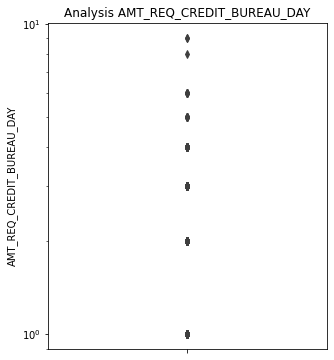

In [45]:
##box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
plt.figure(figsize=(5,6))
sns.boxplot(y=df['AMT_REQ_CREDIT_BUREAU_DAY'])
#to display matplotlib.pyplot with a logarithmic y_axis scale.
plt.yscale('log')
plt.title('Analysis AMT_REQ_CREDIT_BUREAU_DAY',fontsize=12)
plt.show()

In [46]:
#describe the info of column AMT_REQ_CREDIT_BUREAU_DAY
print(df['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


As we can see the numerical column AMT_REQ_CREDIT_BUREAU_DAY has outliers so they need to be removed or capped.Also for missing value fillup we need to use the median in this case.

In [49]:
# Handling outlier

In [47]:
# Removing outlier for the column AMT_REQ_CREDIT_BUREAU_DAY
df_outlier=['AMT_REQ_CREDIT_BUREAU_DAY']
for i in df_outlier:
    percentiles=df[i].quantile([0.01,0.99]).values
    df[i][df[i]<=percentiles[0]]=percentiles[0]
    df[i][df[i]>=percentiles[1]]=percentiles[1]
    

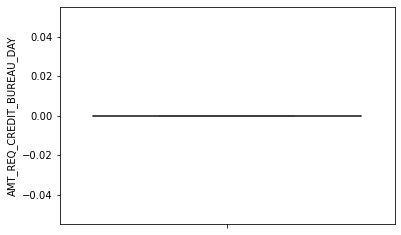

In [48]:
# Box plotting the values of 'AMT_REQ_CREDIT_BUREAU_DAY'
sns.boxplot(y=df['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [50]:
# Casting all variable into numeric in the dataset
df_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[df_cols]=df[df_cols].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

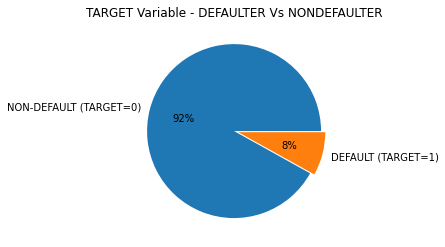

In [52]:
plt.pie(df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

In [53]:
# Creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [54]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [55]:
# Dividing the dataset into two dataset of target=1(client with payment difficulties)and target=0(all other)

target0=df.loc[df['TARGET']==0]
target1=df.loc[df['TARGET']==1]


In [56]:
# Calculating Imbalance percentage
imbalance=round(len(target0)/len(target1),2)
imbalance

11.39

univariate analysis for categories

function to plot the univariate categorical variables

In [57]:
def plotfunc(df,col,title,hue=None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams['axes.labelsize']=15
    plt.rcParams['axes.titlesize']=18
    plt.rcParams['axes.titlepad']=30
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    ax=sns.countplot(data=df,x=col,hue=hue,palette='bright')
    plt.setp(ax.get_xticklabels(),rotation=45,ha='right',rotation_mode='anchor')
    
    plt.show()

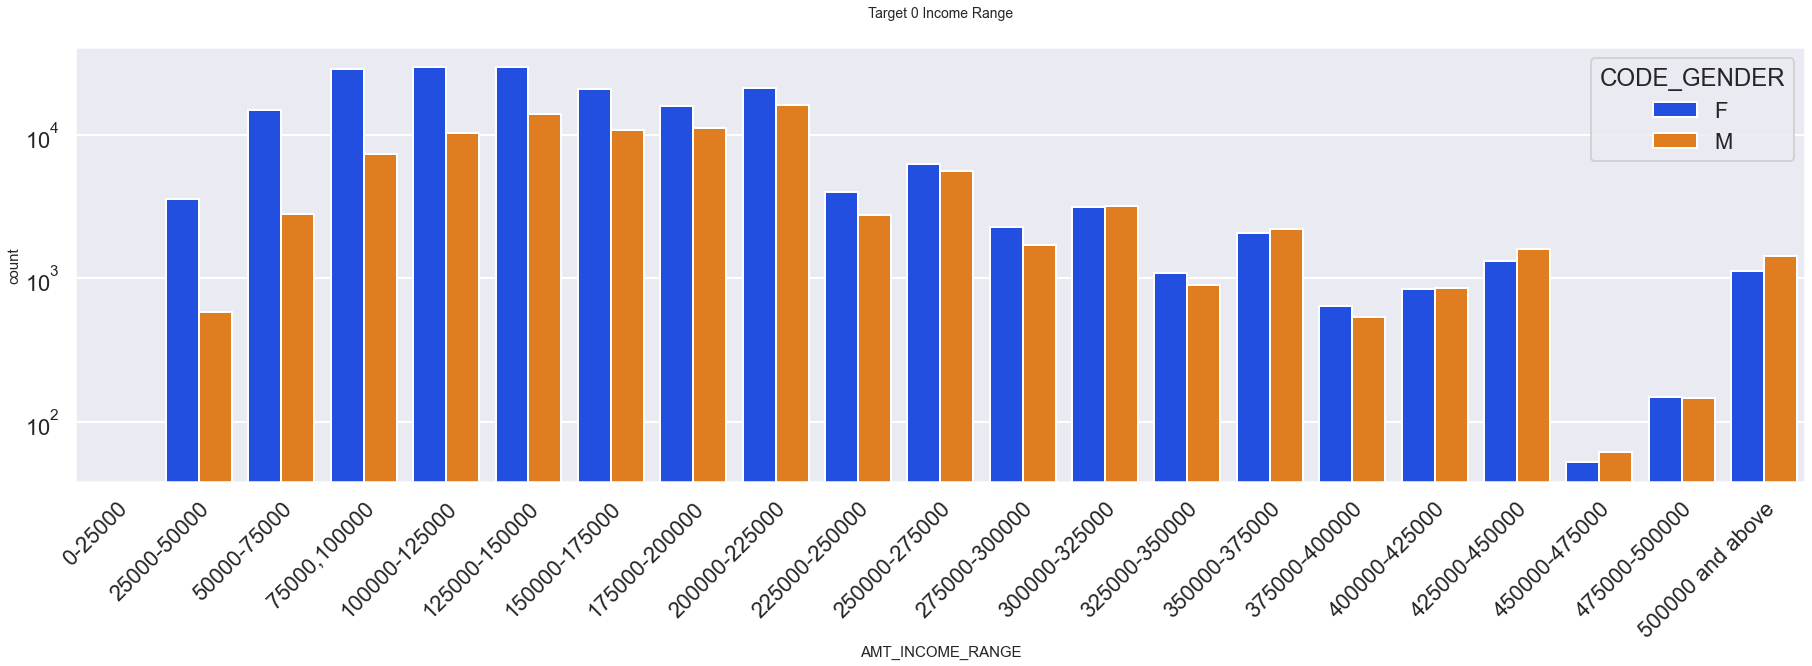

In [113]:
# Plotting for income range for target0
plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 Income Range',hue='CODE_GENDER')



pointsto be concluded from the above graph for target=0(Non-Defaulters).
1. Female counts are higher than male.
2. This graph show that females are more than male in having credits for that range.

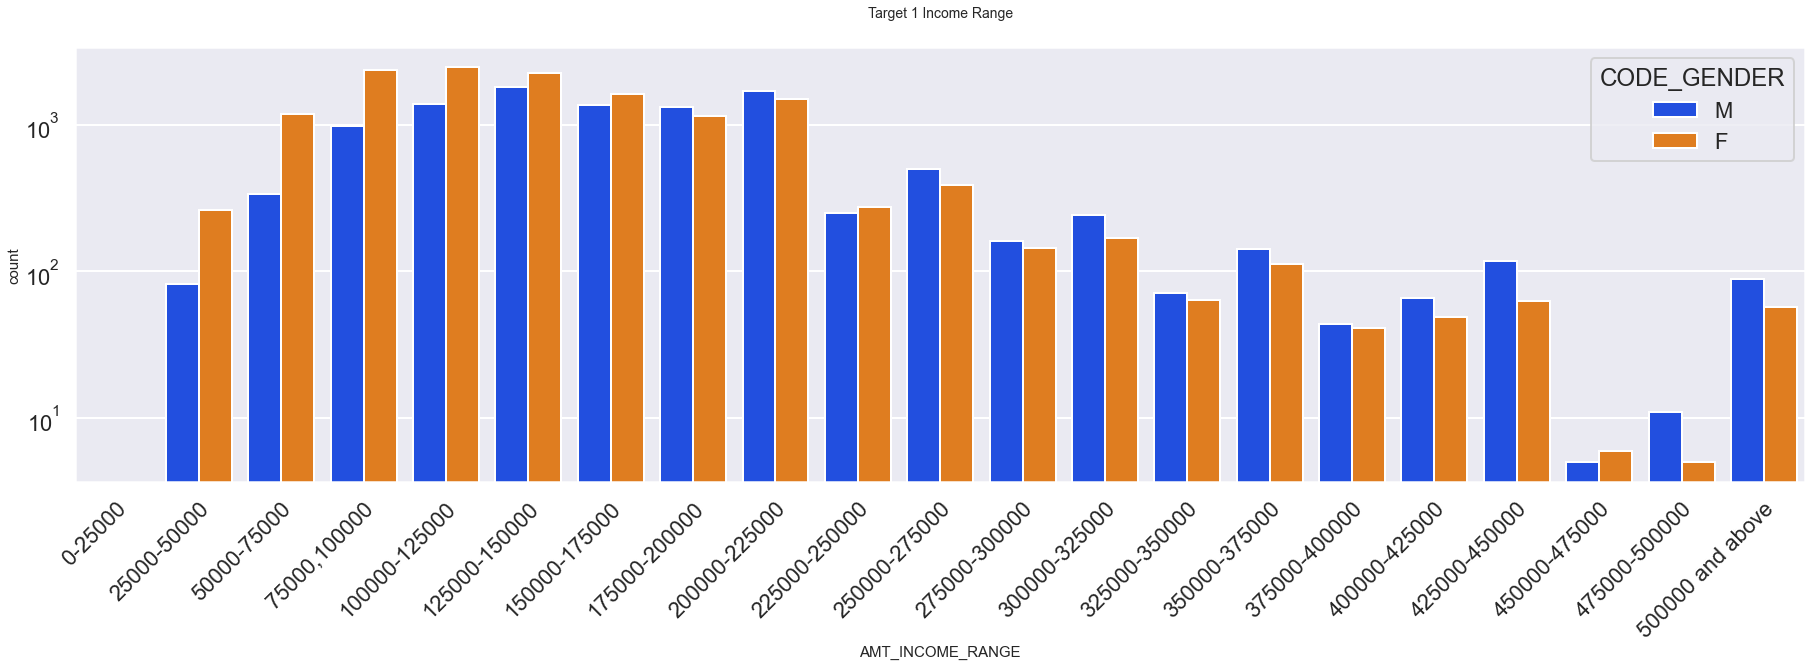

In [58]:
# Plotting for income range for target1
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 Income Range',hue='CODE_GENDER')


Points to be concluded from the above graph for Target=1 (Defaulters).
1. Male counts are higher than female.
2. This graph show that males are more than female in having credits between 100000 and 200000.

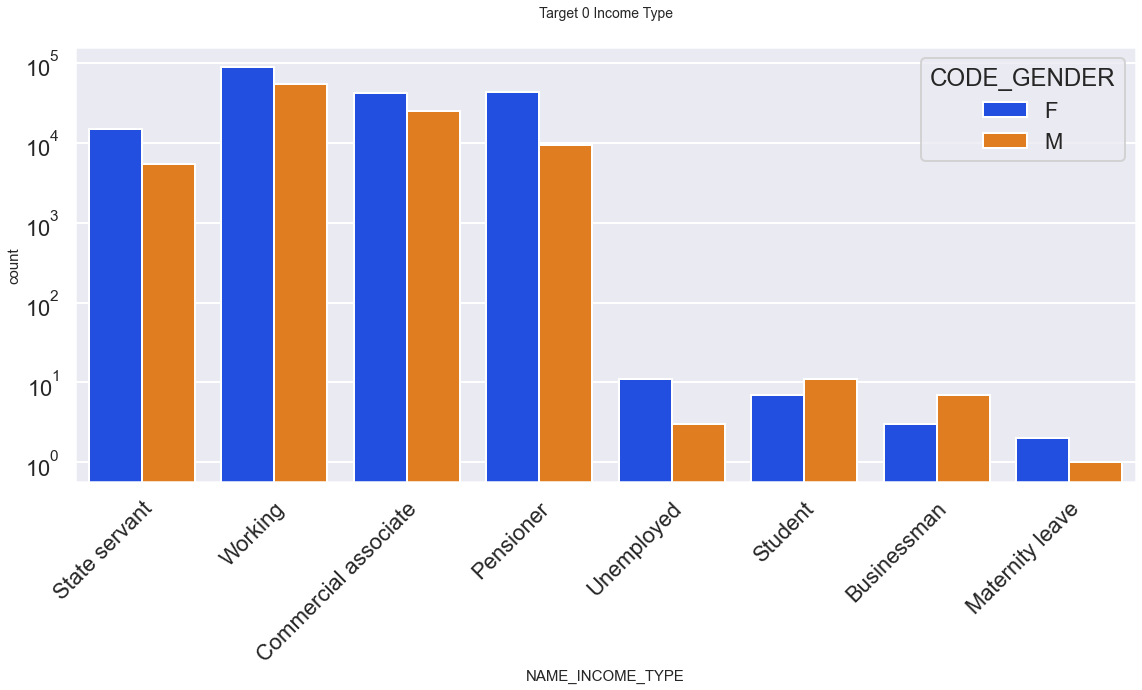

In [114]:
# Plotting for Income type for targer 0
plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 Income Type',hue='CODE_GENDER')

points to be concluded from the above graph for Target=0 (Non-Defaulters).
1. Female are having more credit than males
2. High number of credit for income type working , commercial associate , pensioner and state servant
3. Low number of credit for income type student ,unemployed, businessman and maternity leave

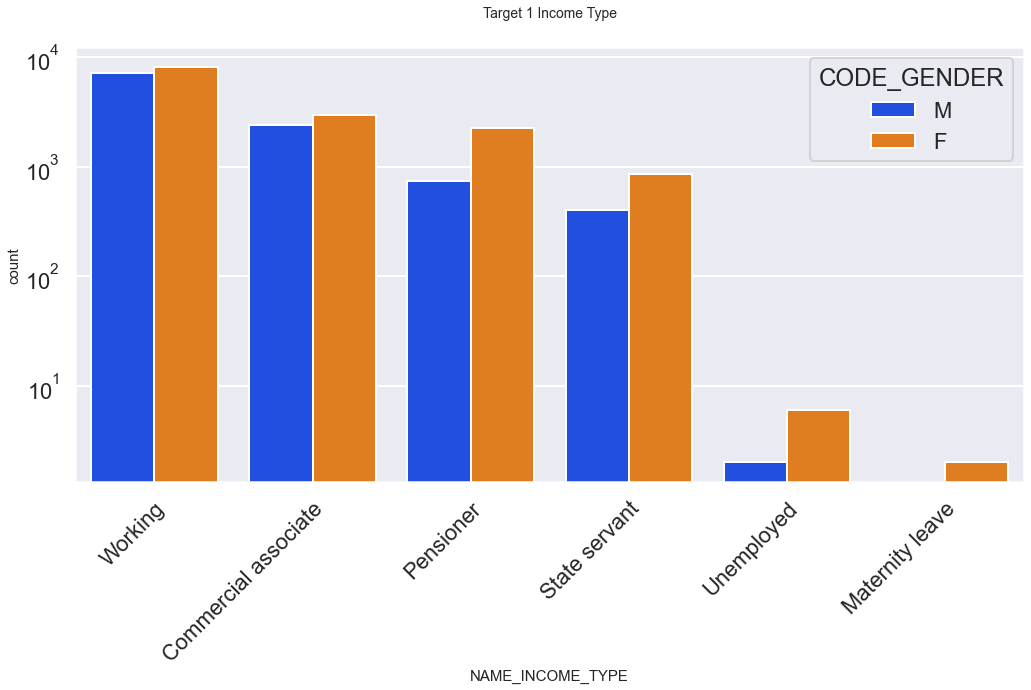

In [61]:
# Plotting for Income Type for target1
plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 1 Income Type',hue='CODE_GENDER')


Points to be concluded from the above graph for Target=1 (Defaulters).
1. High number of credit for income type working , commercial associate , pensioner and state servant.Same as of target0
2. Low number of credit for income type unemployed and maternity leave

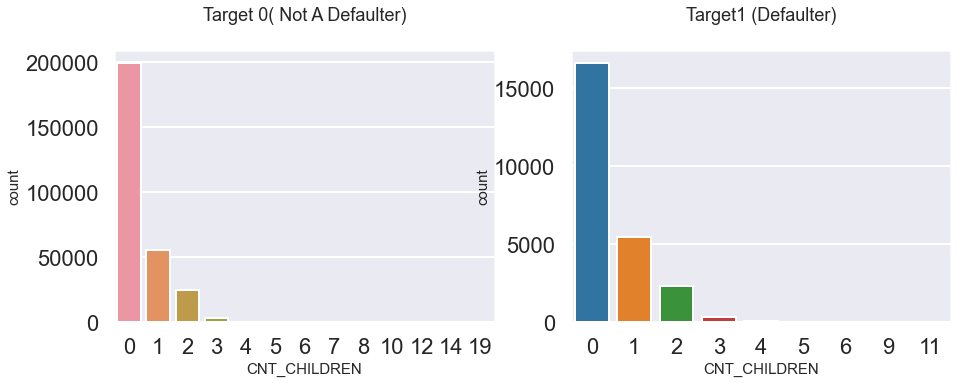

In [115]:
# Plotting for CNT_CHILDREN for target0 and target1
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(target0['CNT_CHILDREN'], ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['CNT_CHILDREN'], ax=ax[1]).set_title('Target1 (Defaulter)')
fig.show()


Points to be concluded from the above graph:
1. We can see that low child count maximizes that chances of both being a defaulter and also non defaulter. So we cannot conclude any specifics from this exploration.

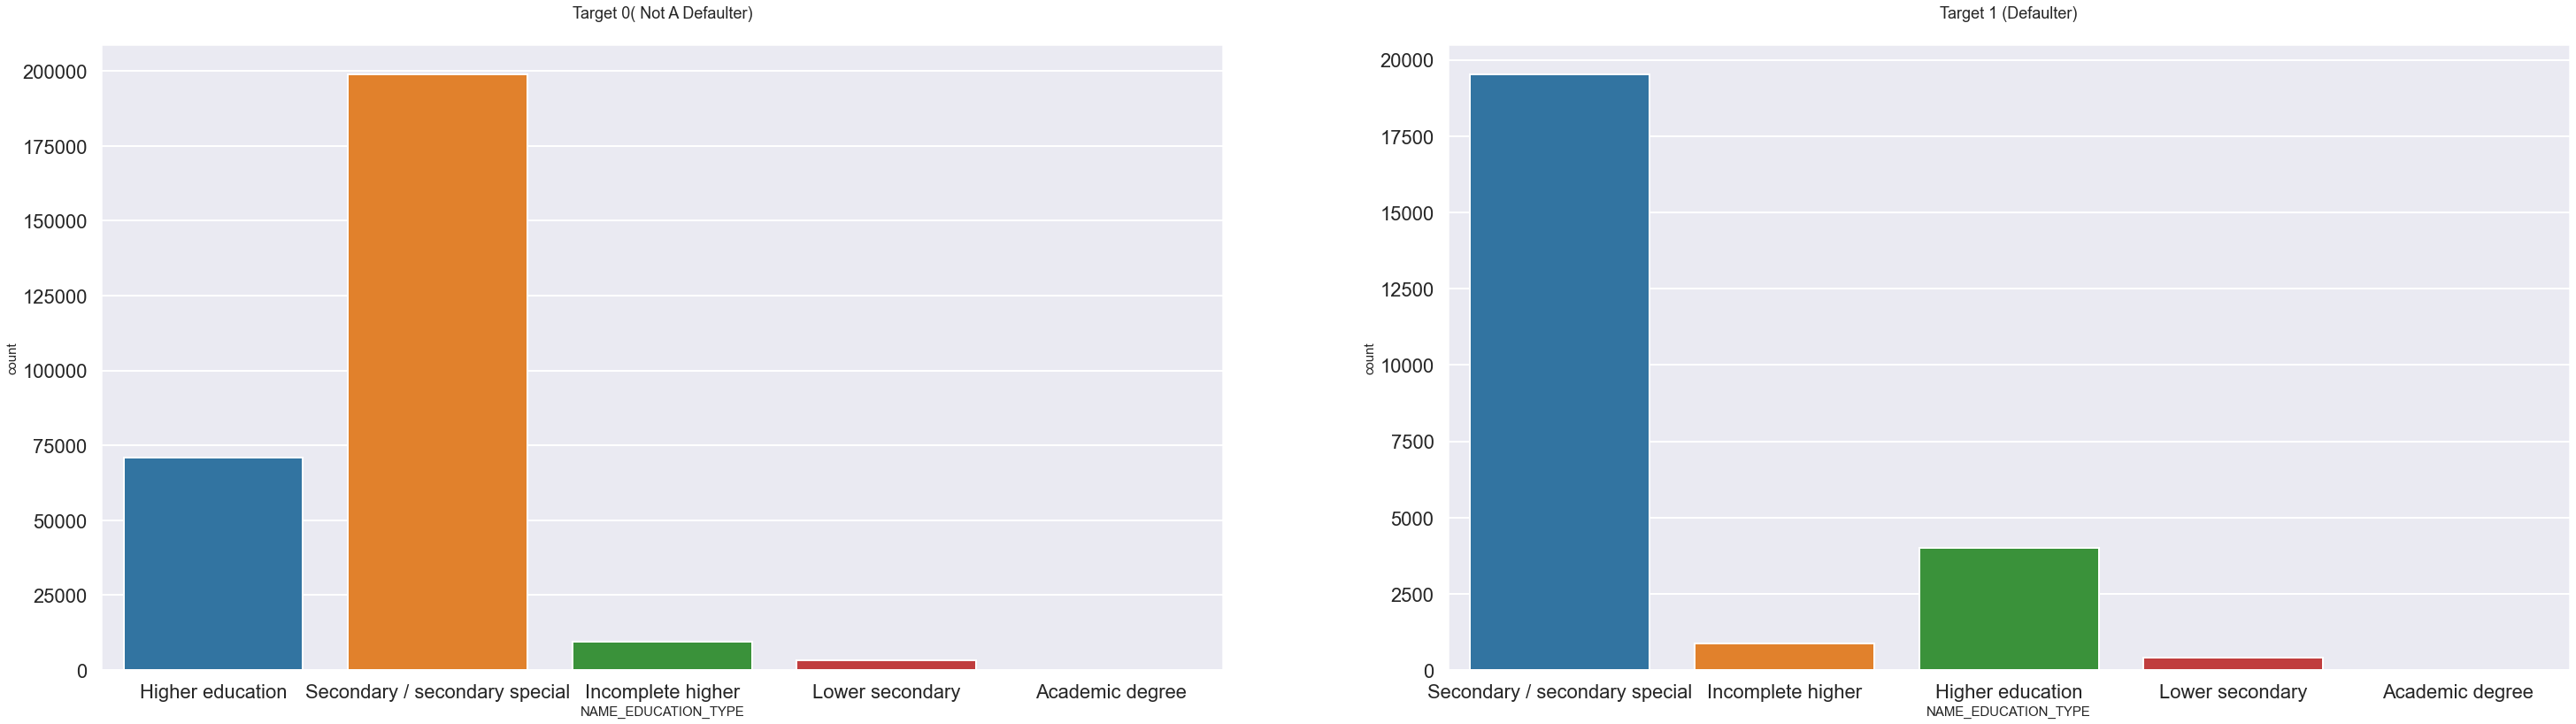

In [116]:
# Plotting for NAME_EDUCATION_TYPE for target0 and target1
fig, ax=plt.subplots(1,2,figsize=(50,13))
sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()


Points to be concluded from the above graph :
1. From this comparison we can see that people with secondary education has defaulted the most.

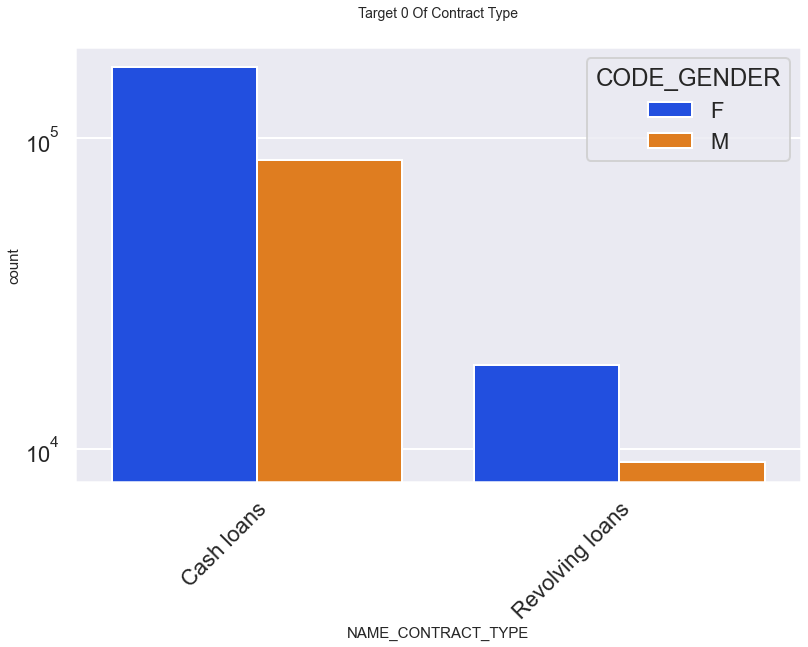

In [117]:
#Plotting for NAME_CONTRACT_TYPE for target0
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 Of Contract Type',hue='CODE_GENDER')

Inference
Points to be concluded from the above graph for Target=0 (Non-Defaulters).
1. Cash Loan contracts have a higher number of credit than revolving loan contracts.
2. Count of female is more.

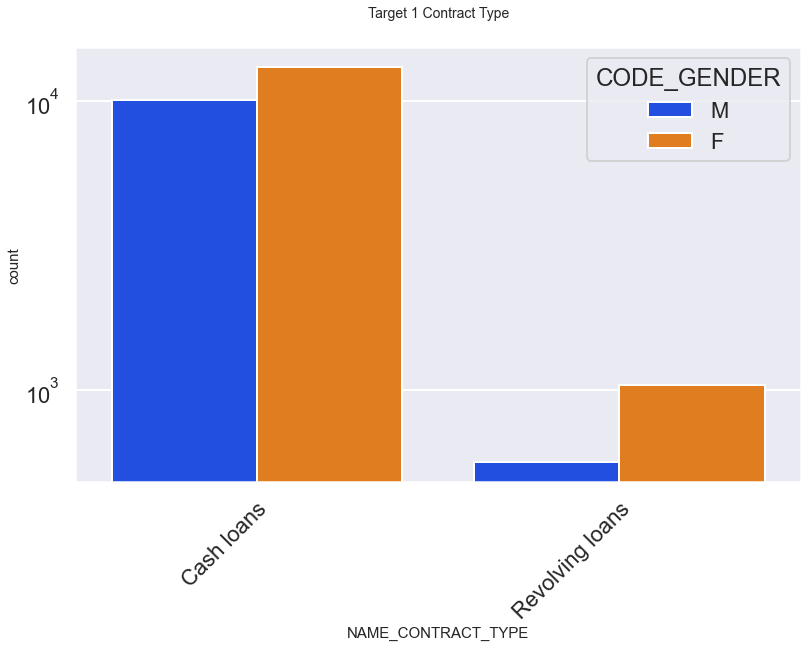

In [118]:
#Plotting for NAME_CONTRACT_TYPE for target1
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 Contract Type',hue='CODE_GENDER')



Points to be concluded from the above graph for Target = 1 (Defaulters).
1. Cash Loan contracts have a higher number of credit than revolving loan contracts
2. There is only female revolving loans.

Continuous Univariate Analysis



In [120]:
# Function for box plot
def cusBoxPlot(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =data, x=col,orient='v',color="orange")
    plt.show()

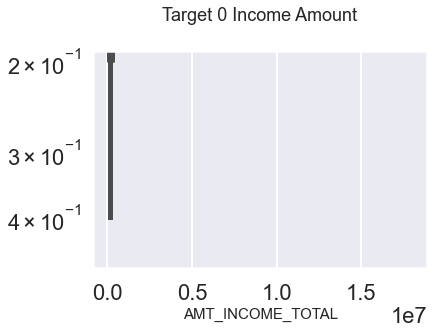

In [121]:
#Distribution of income amount for Target0
cusBoxPlot(data=target0,col='AMT_INCOME_TOTAL',title='Target 0 Income Amount')

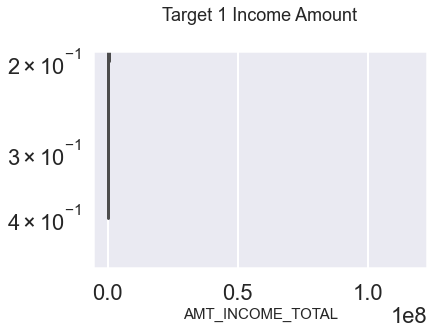

In [86]:
# Distribution of income amount for Target1
cusBoxPlot(data=target1,col='AMT_INCOME_TOTAL',title='Target 1 Income Amount')


Points to be concluded from the above 2 graph
1. Outliners are present in both
2. 3rd quartile is narrow for both target 1 and target 0
3. Most of the clients have income in the 1st quartile


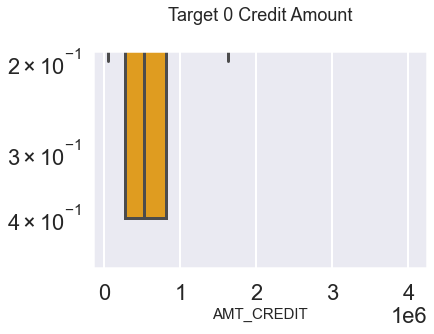

In [122]:
# Disrtibution of credit amount for Target 0
cusBoxPlot(data=target0,col='AMT_CREDIT',title='Target 0 Credit Amount')

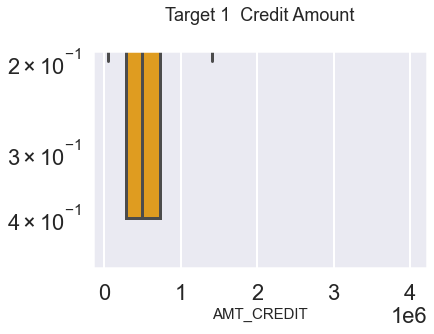

In [123]:
# Disrtibution of credit amount for Target 1
cusBoxPlot(data=target1,col='AMT_CREDIT',title='Target 1  Credit Amount')


Points to be concluded from the above 2 graph
1. Outliners are present in both
2. 3rd quartile is narrow for both target 1 and target 0
3. Most of the clients have credit amount in the 1st quartile

Bivariate Analysis

Analysing correlation for numercial columns for both Target 0 and Target1

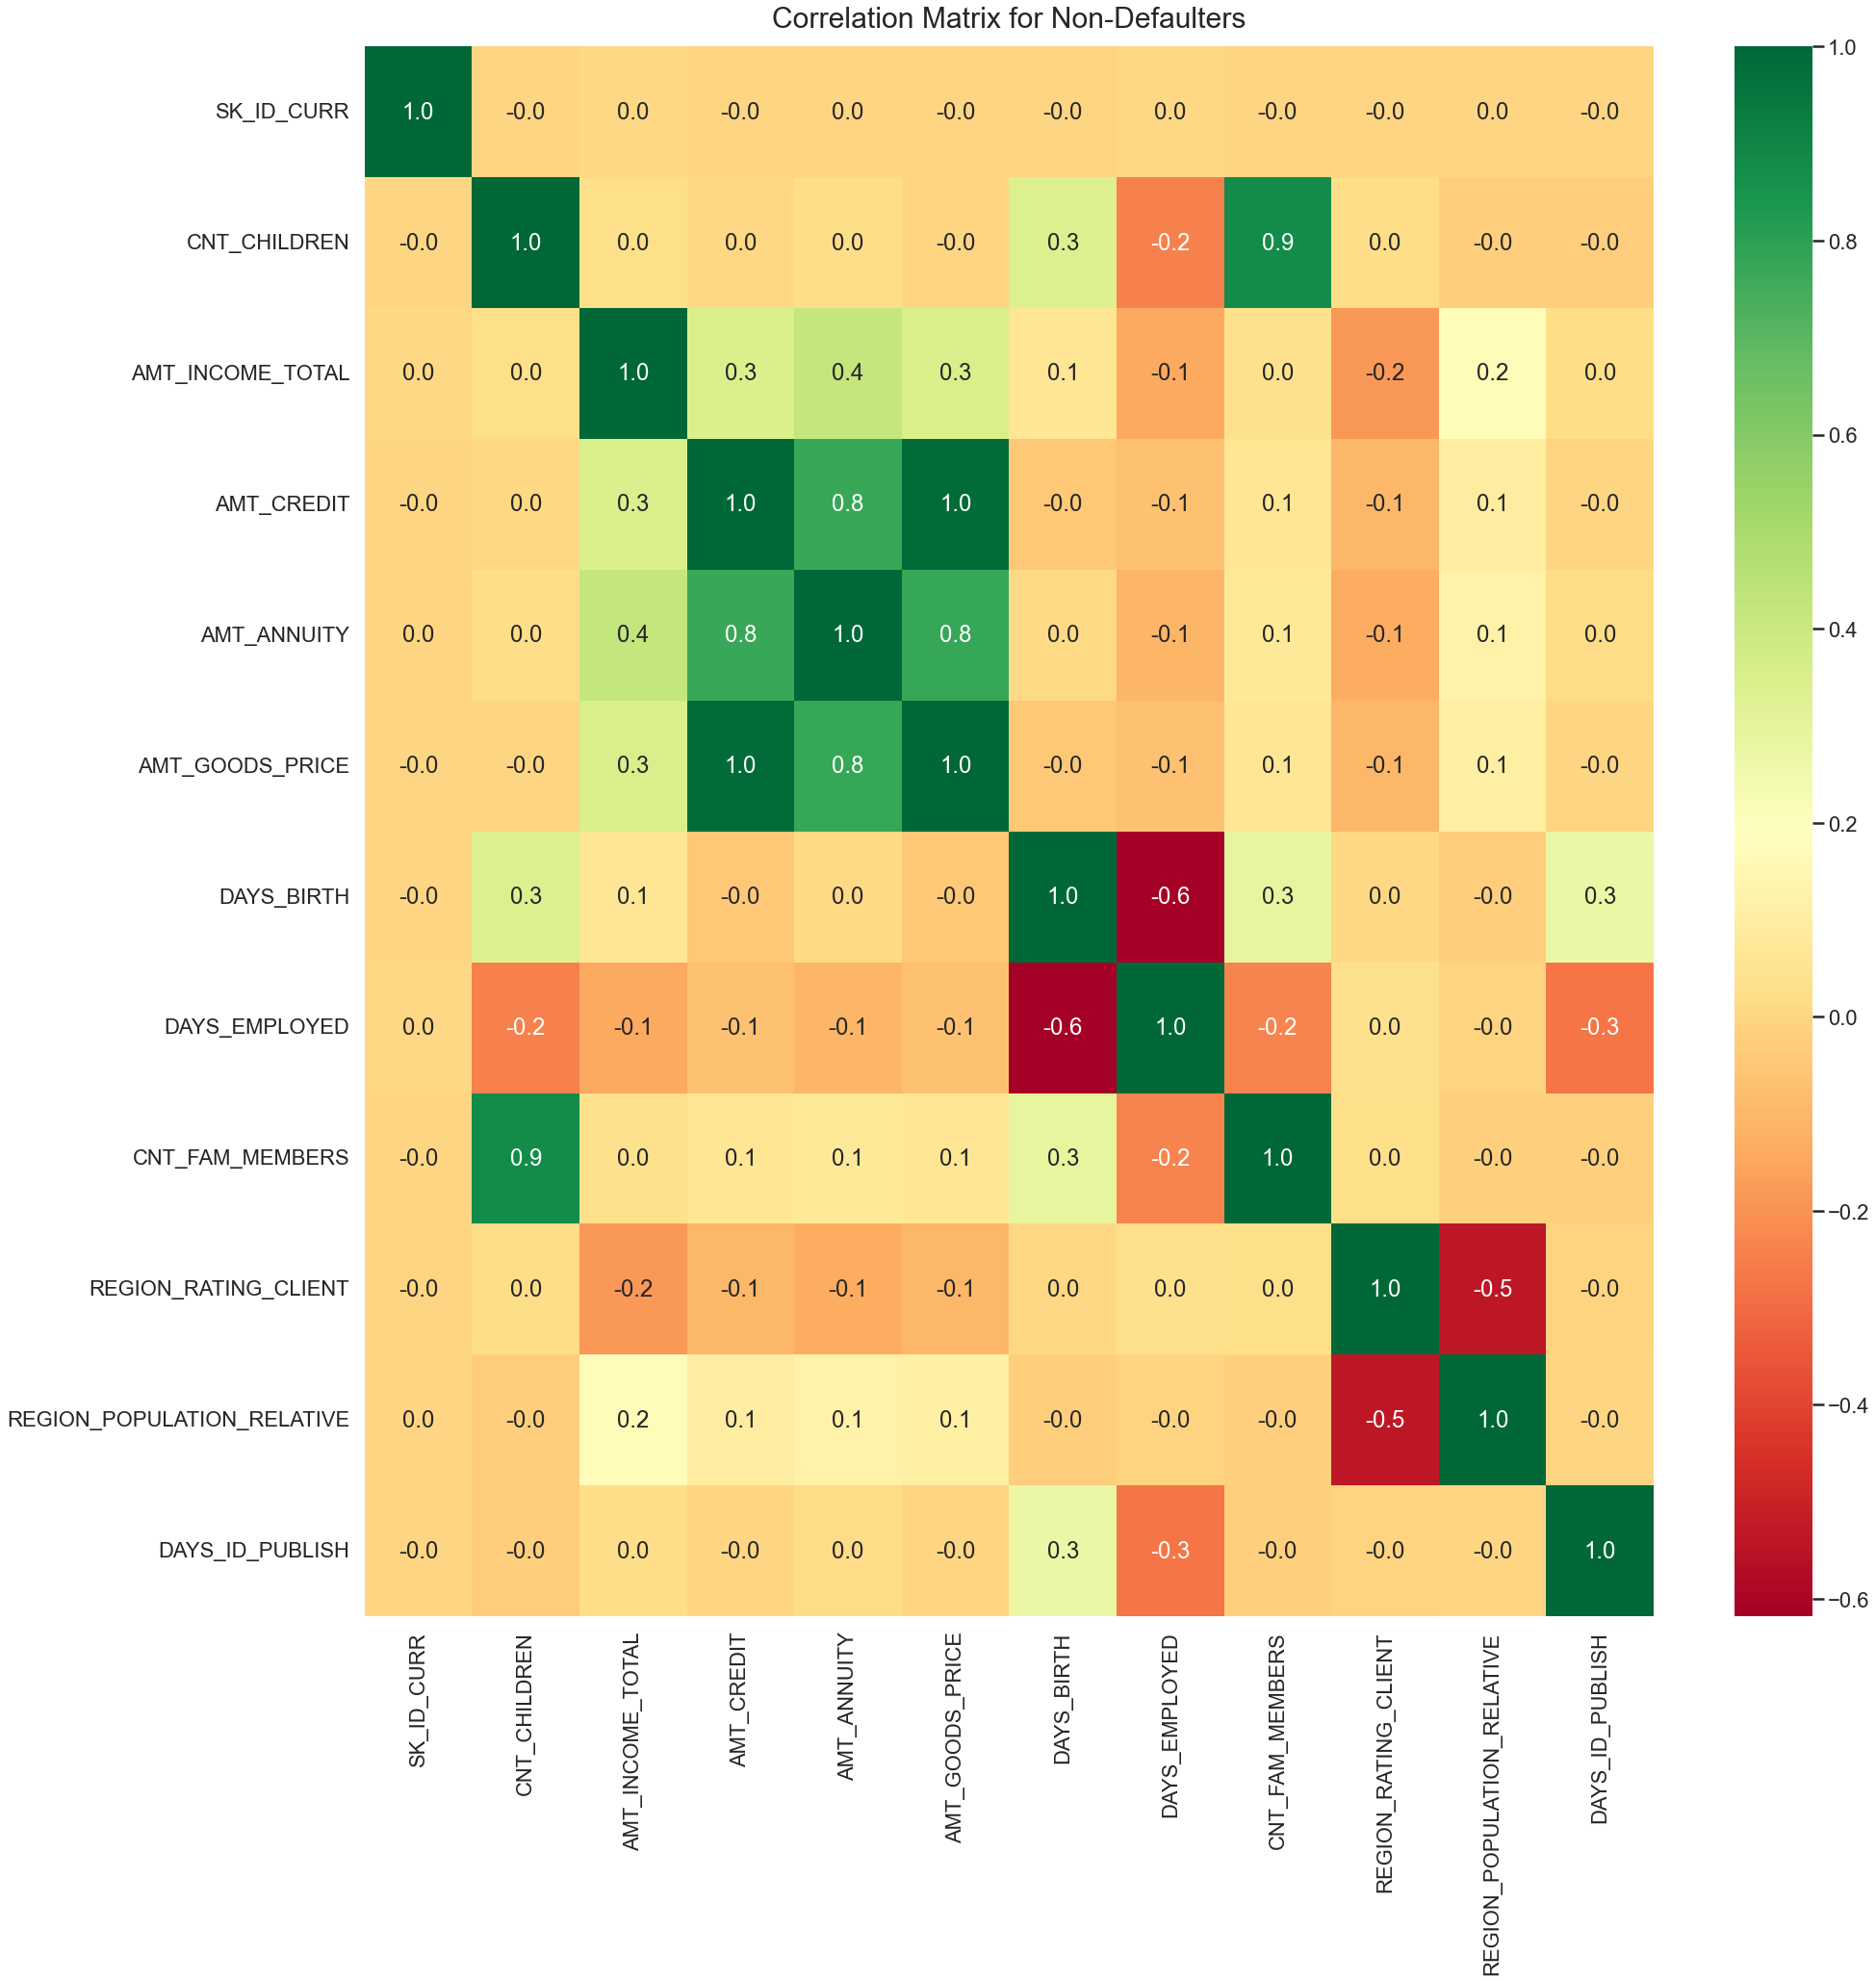

In [126]:
#Plotting Correlation matrix for Target 0 application data
d=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()


these columns have high correlation values for Target 0.

AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBERS and CNT_CHILDREN
AMT_ANNUITY and AMT_INCOME_TOTAL
AMT_INCOME_TOTAL and AMT_GOODS_PRICE

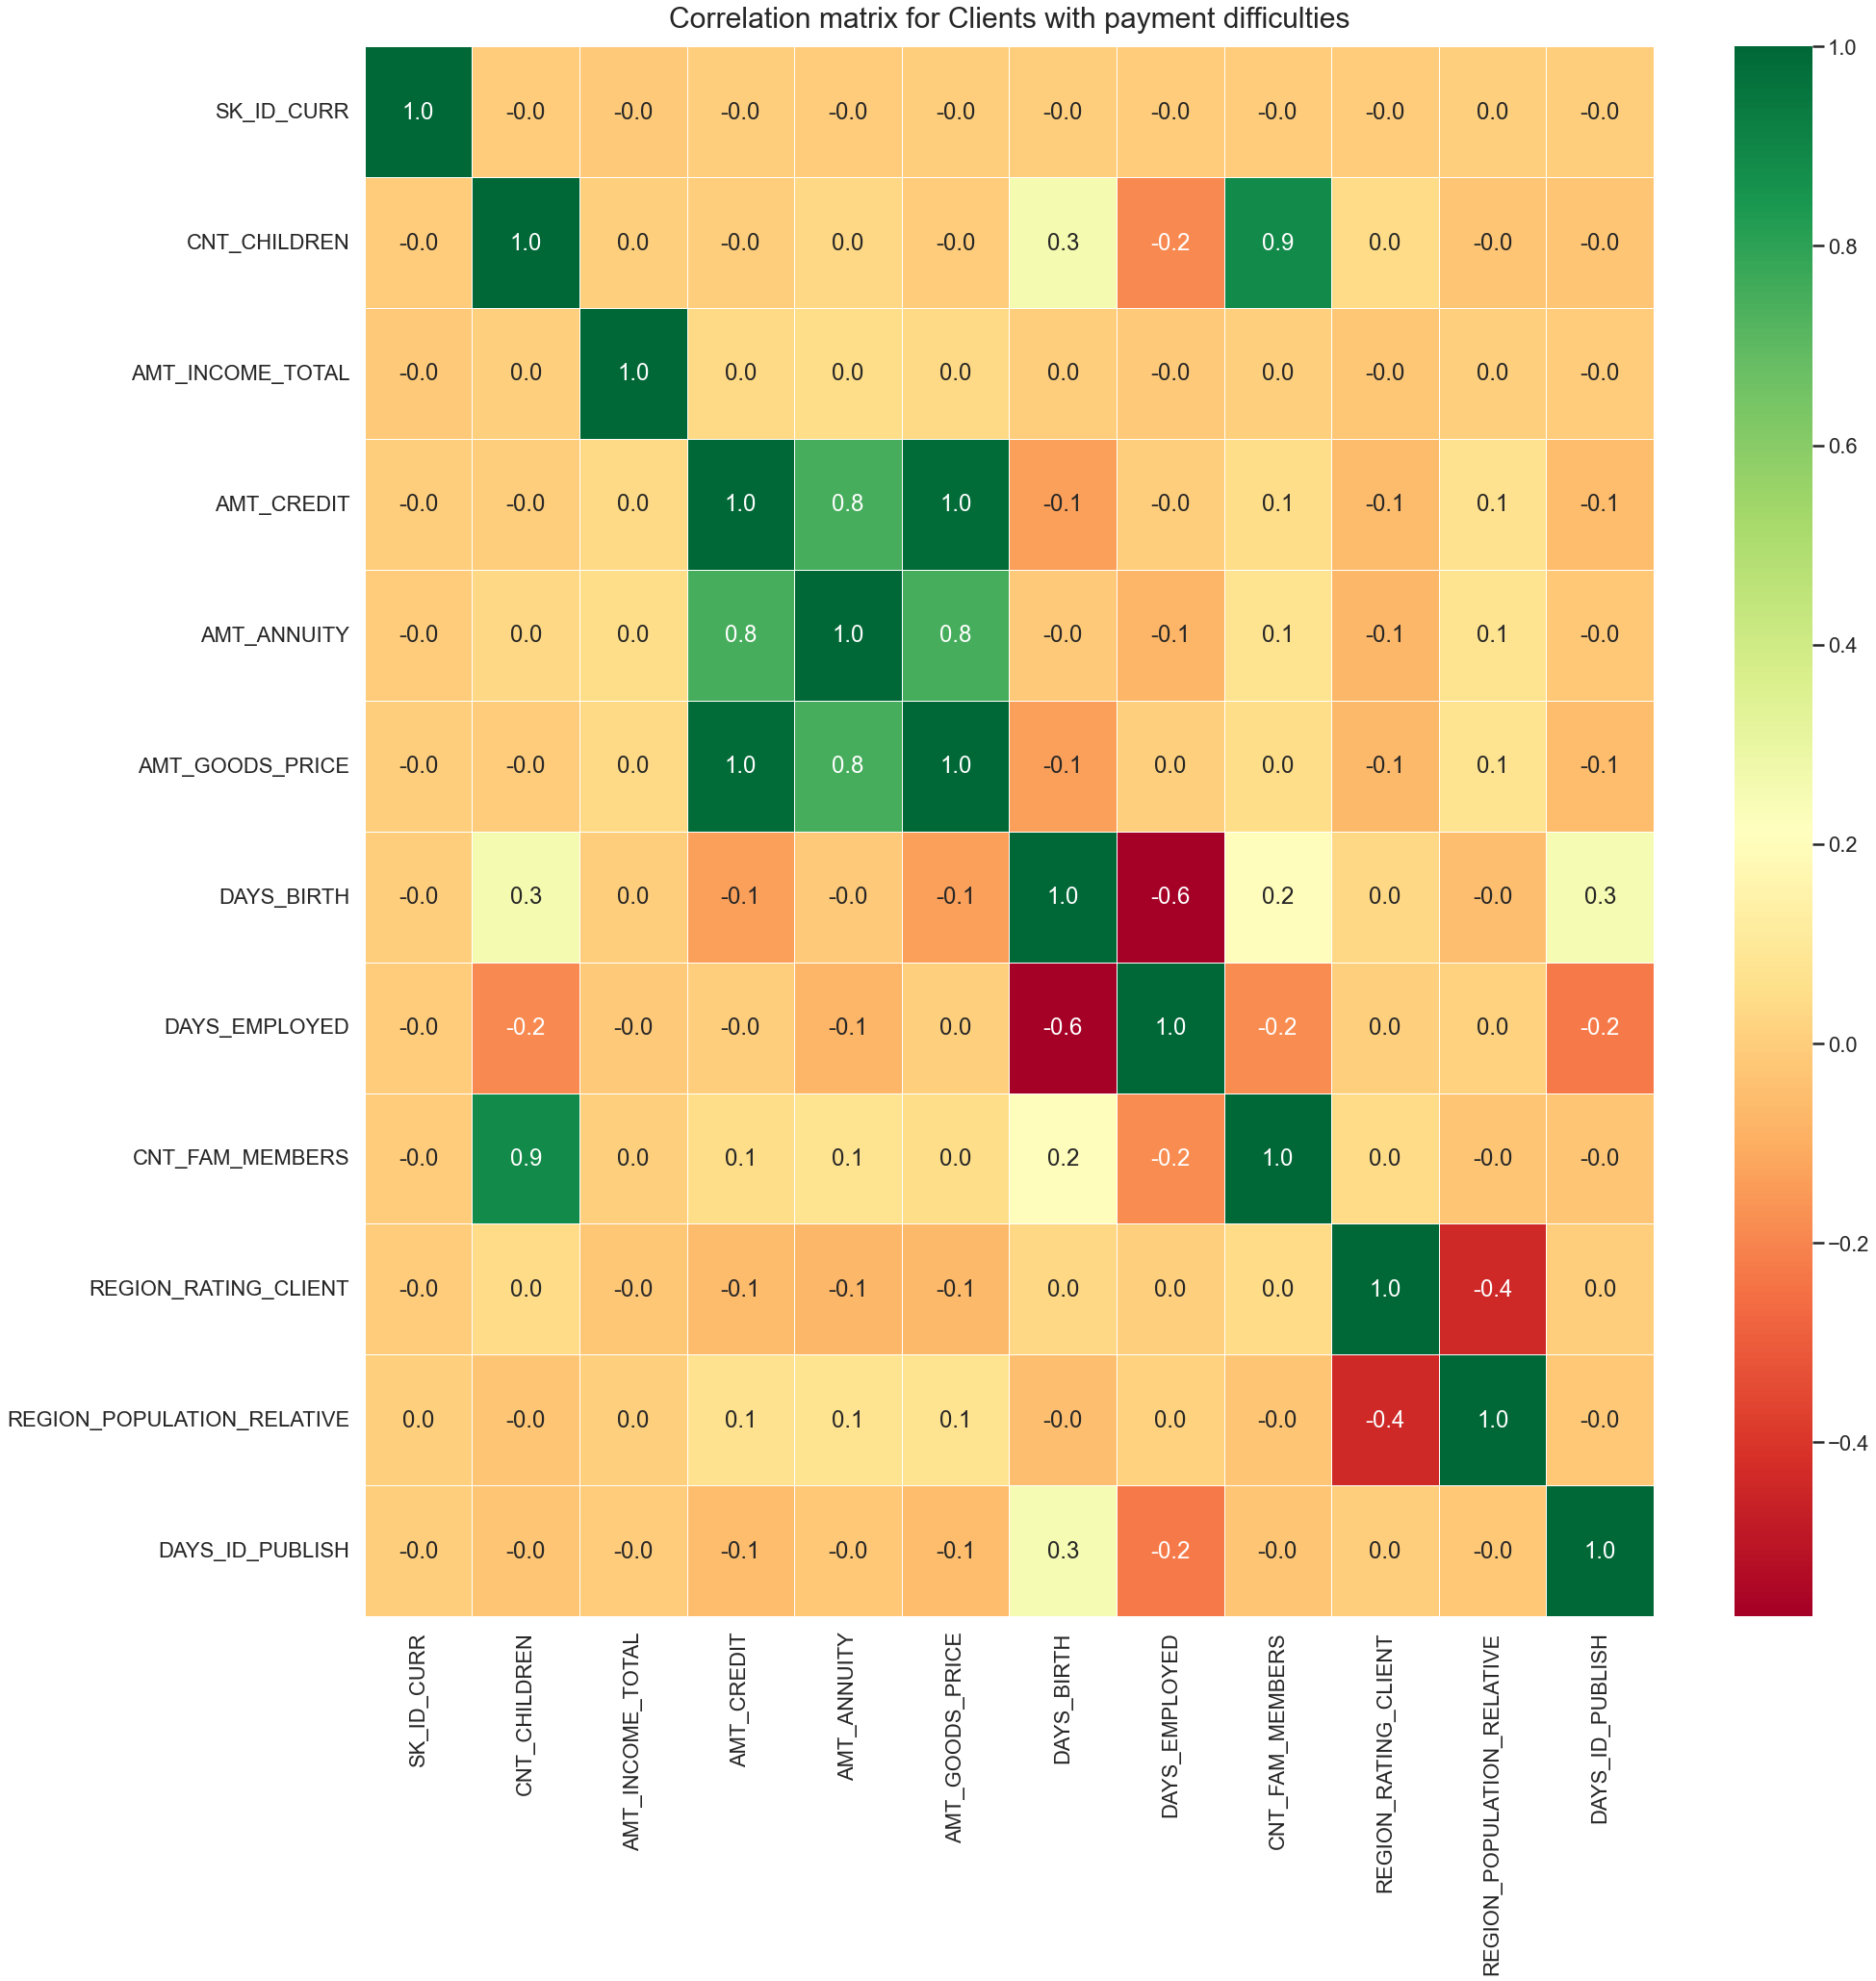

In [127]:
#Plotting Correlation matrix for Target 1 application data
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

**Both for Target 0 and Target 1 these columns have high correlation values.

AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBER and CNT_CHILDREN
AMT_ANNUITY and AMT_INCOME_TOTAL
AMT_INCOME_TOTAL and AMT_GOODS_PRICE

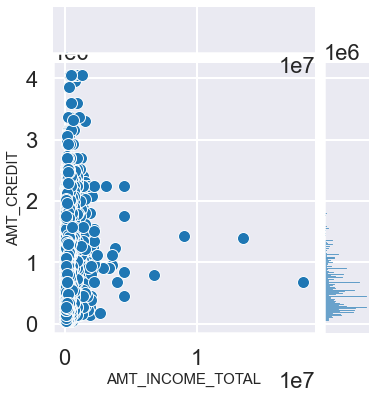

In [128]:
#ploting income vs credit for Target 0
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target0)
plt.show()

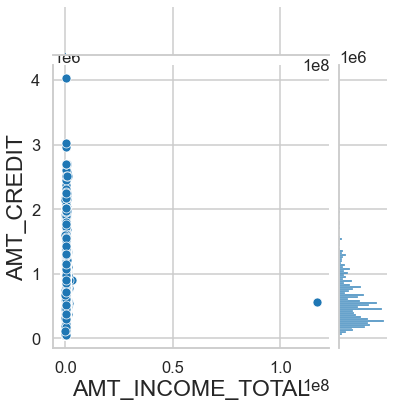

In [146]:
#ploting income vs credit for Target 1

sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target1)
plt.show()

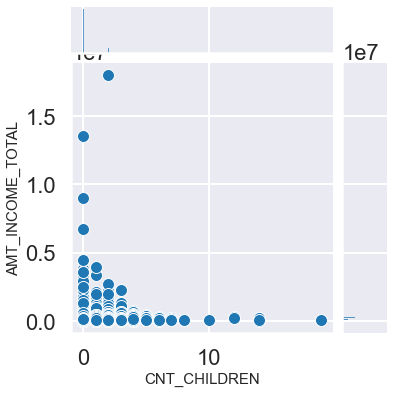

In [130]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 0
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target0)
plt.show()

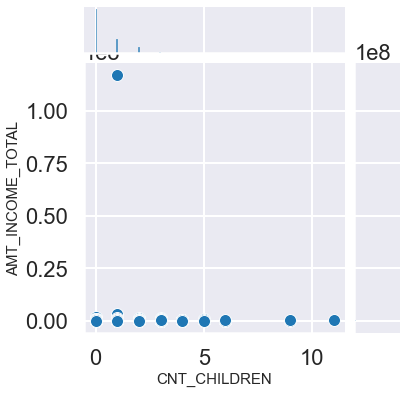

In [85]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 1
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target1)
plt.show()

1. Analysis of Credit Amount With Respect To Education Status

Text(0.5, 1.0, 'Credit Amount vs Education status For Traget 0')

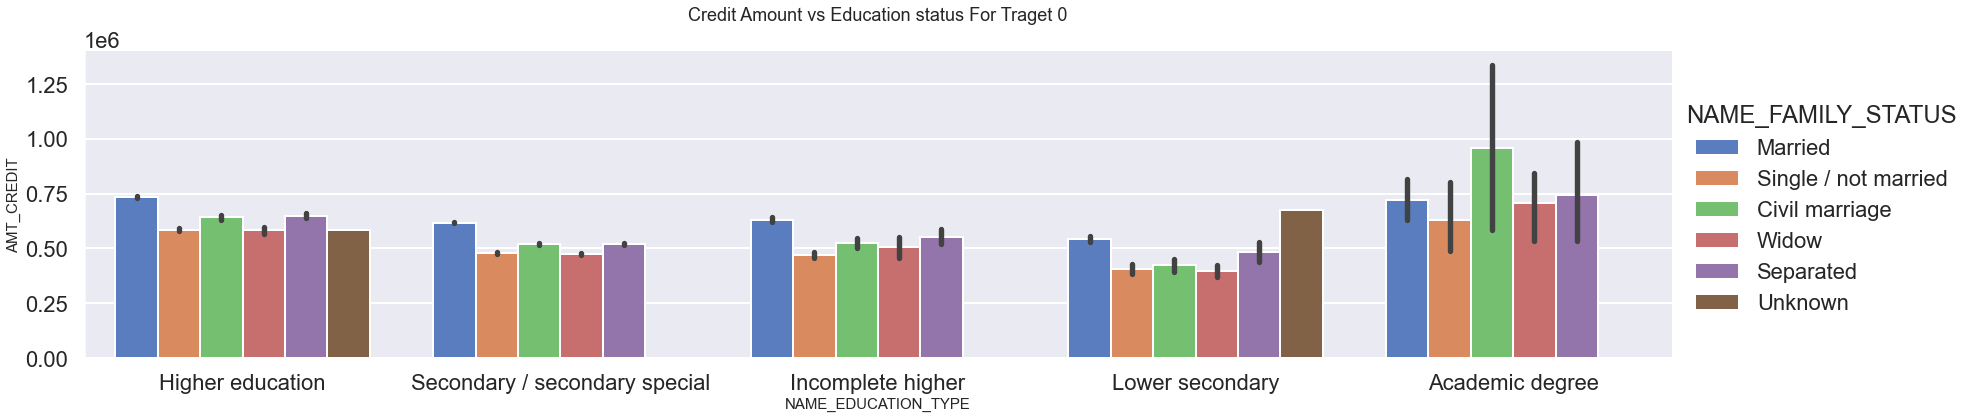

In [134]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education status For Traget 0')


Points to be concluded from the above graph for target = 0 (Non-Defaulters).
1. Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.
2. Lower educated customers tends to have lower credit amount, Widows being the lowest among them
3. Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

Text(0.5, 1.0, 'Credit Amount svss Education Status for Traget 1')

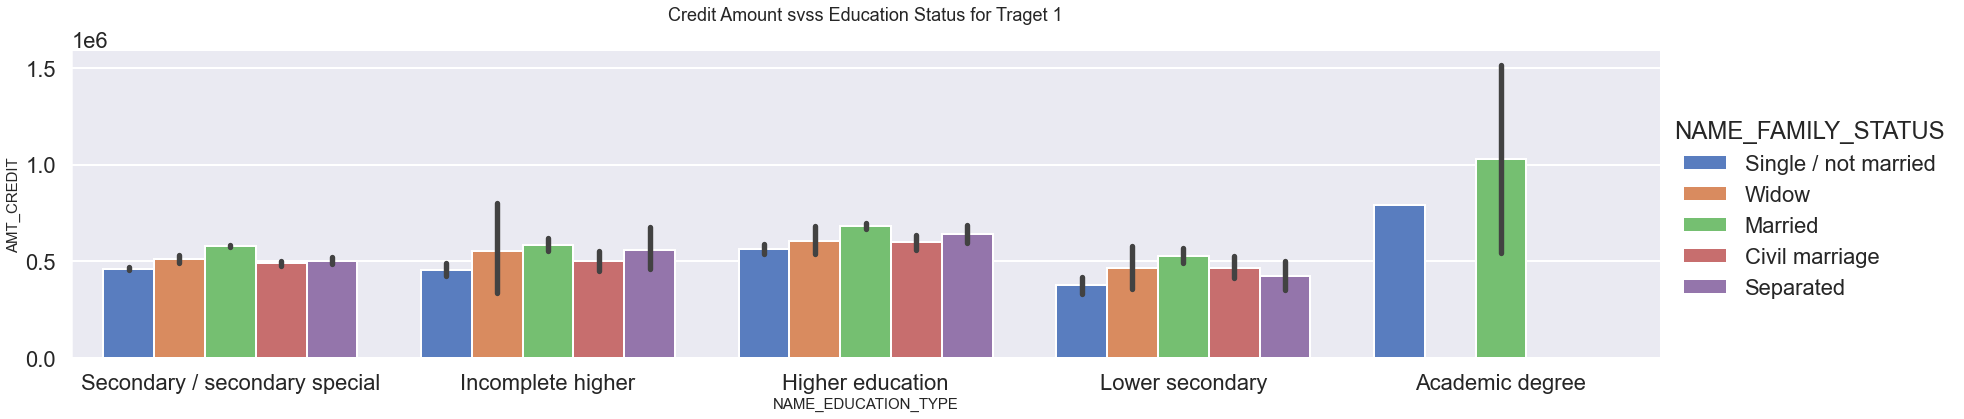

In [135]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount svss Education Status for Traget 1')

Inference:
Points to be  concluded from the above graph for target = 1 (Defaulters).
1.Married  Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high
2. Accross all  education segment married customer tends to have higher credit amount
3. Customers holding  lower eductation tends to have a lower credit amount
4. Single and Married are the only 2 family types  present in academic degree .

2. Analysis of Income amount with respect to Education status

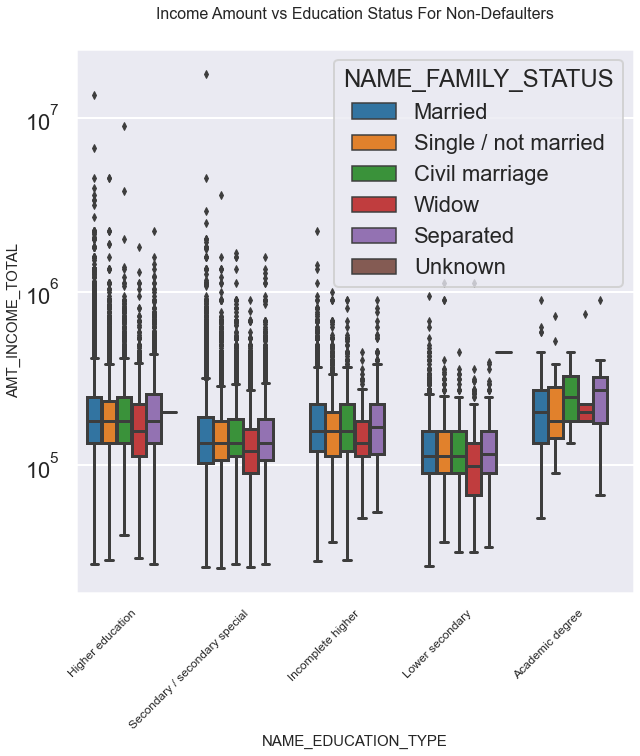

In [136]:
# Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=16)
plt.show()

Inference:
Points to be concluded from the above graph for target = 0 (Non-Defaulters).
1. For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.
2. Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.
3. Lower secondary of civil marriage family status are have less income amount than others.

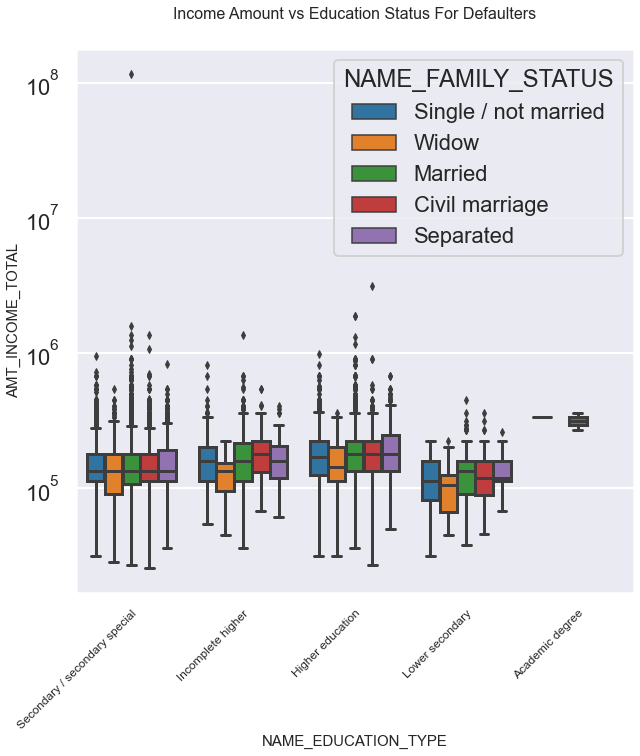

In [137]:
# Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=16)
plt.show()


Points to be concluded from the above graph for target = 1 (Defaulters).
1. Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.
2. No outlier for Academic degree but there income amount is little higher than that Higher education.
3. Lower secondary are having less income amount than others.

In [ ]:
##  now using df1 data

In [92]:
# Cleaning the missing data
# listing the null values columns having more than 50%

df_1=df1.isnull().sum()
df_1=df_1[df_1.values>(0.5*len(df_1))]
len(df_1)

15

In [93]:
#Removing those 15 columns

df_1 = list(df_1[df_1.values>=0.5].index)
df1.drop(labels=df_1,axis=1,inplace=True)
df1.shape

(1670214, 22)

In [94]:
#Removing the column values of 'XNA' and 'XAP'
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
df1.shape

(69635, 22)

In [97]:
#Merging the Application dataset with previous appliaction dataset
Merge_data=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [98]:
Merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,...,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,...,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,...,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,0.9831,0.1667,0.9831,0.1667,0.9831,0.1667,0.0734,No,...,-540.0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [99]:
# Renaming the column names after merging
Merge_data = Merge_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [100]:
# Removing unwanted columns for analysis
Merge_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [101]:
#check shape of the Merged Data
Merge_data.shape

(59413, 91)

Performing Univariate Analysis

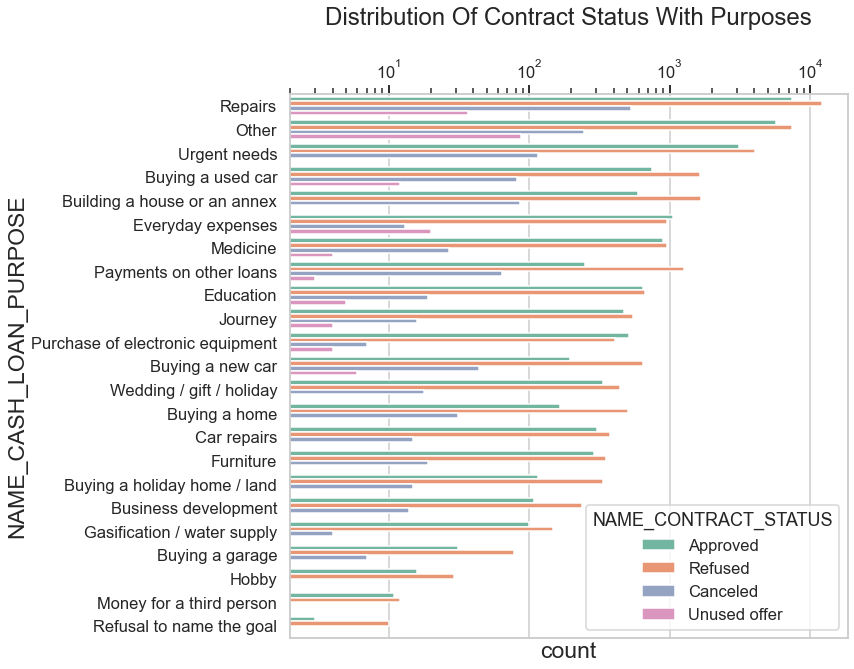

In [144]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 23
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 33
plt.title('Distribution Of Contract Status With Purposes')
plt.xscale('log')

ax = sns.countplot(data = Merge_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='Set2') 
ax.xaxis.tick_top()


We can conclude the below points from the graph:
1.Most rejection of loans came from purpose 'Repairs'.
2.We have almost equal number of approves and rejection for Medicine,Every day expenses and education purposes.

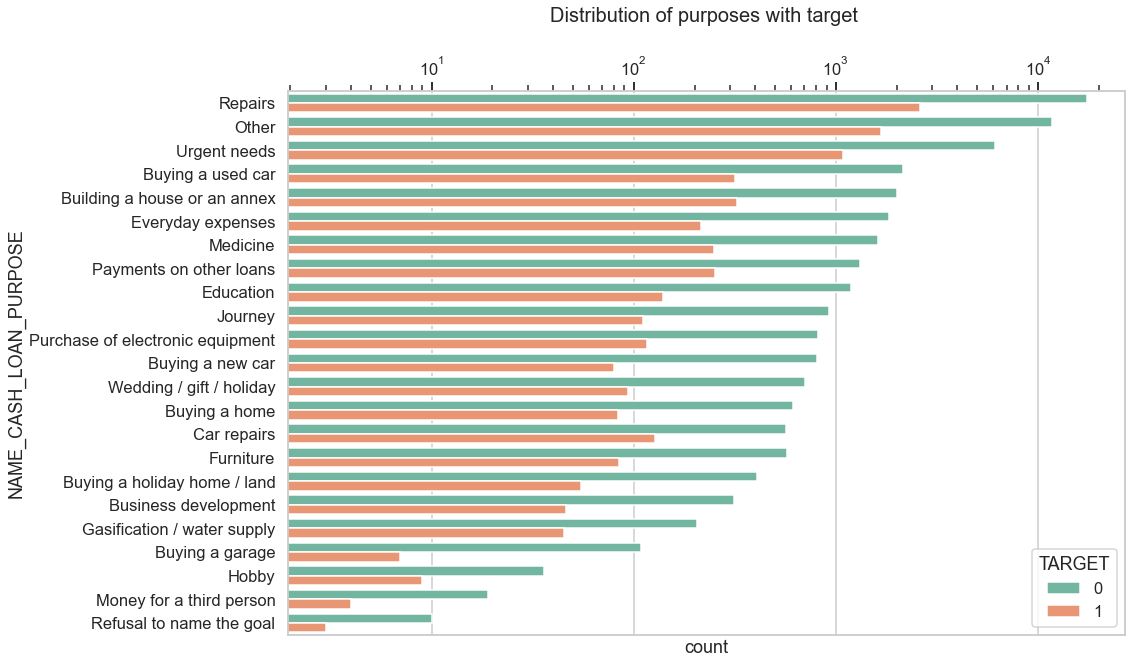

In [140]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 33
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = Merge_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merge_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='Set2') 
ax.xaxis.tick_top()

We can conclude from above plot that loan purpose with 'Repairs' are facing more difficulites in payment on time.

Performing Bivariate Analysis



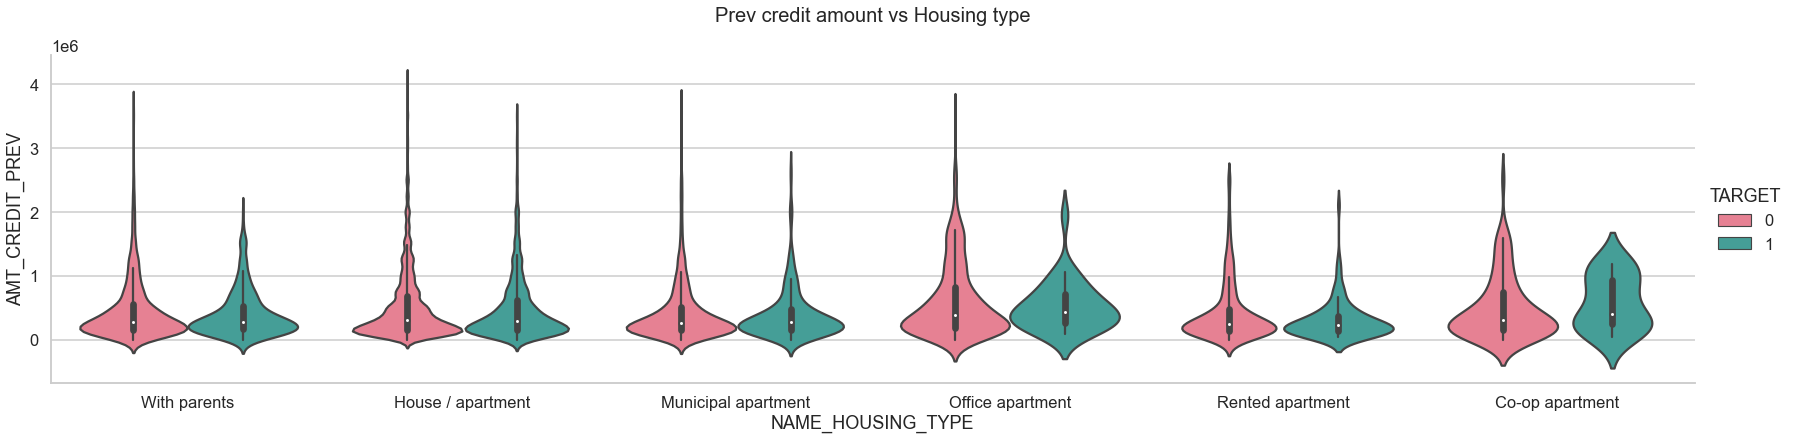

In [141]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merge_data, kind="violin",height=6,aspect=4,palette='husl')
plt.title('Prev credit amount vs Housing type')
plt.show()

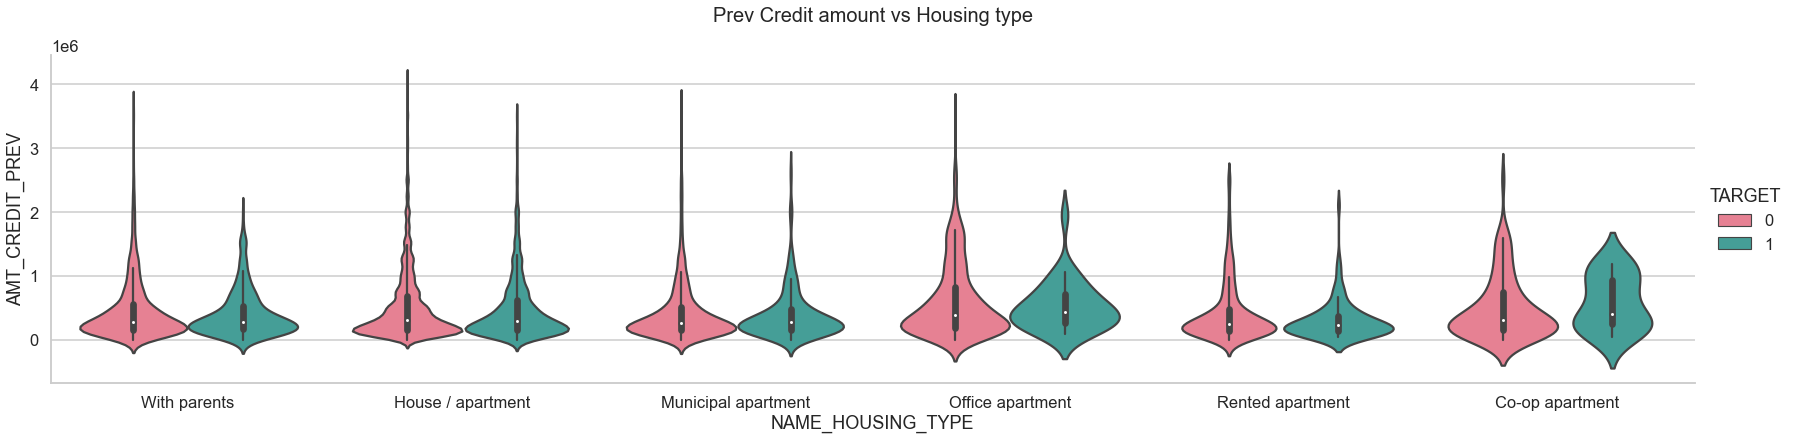

In [143]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merge_data, kind="violin",height=6,aspect=4,palette='husl')
plt.title('Prev Credit amount vs Housing type')
plt.show()

We can conclude that  bank should avoid giving loans to the housing type of co-op apartment as they having difficulties in payment.